In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import pickle

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn import preprocessing

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit,HalvingGridSearchCV
from sklearn.svm import SVR

In [4]:
df_train=pd.read_csv("/Users/luca/Desktop/GEFCom2014 Data/Load/L-train.csv")

y_train=df_train["LOAD"]
X_train=df_train[["DAY","MONTH","HOUR","DAY_OF_WEEK","IS_HOLIDAY","w_avg"]]

df_test=pd.read_csv(f"/Users/luca/Desktop/GEFCom2014 Data/Load/Task 1/L1-test_clean.csv")

X_test=df_test[["DAY",  "MONTH",  "HOUR",  "DAY_OF_WEEK",  "IS_HOLIDAY",  "w_avg"]]
y_test=df_test["LOAD"]

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# init model
krnsvr_blueprint=SVR(kernel="rbf")

param_grid = {"gamma":[1,10,100,0.5,1e-1],"C":[100,1000,10,1]}

In [6]:
# 53m 53.3s

# krnsvr = HalvingGridSearchCV(krnsvr_blueprint, param_grid, scoring="neg_mean_squared_error").fit(X_train_scaled, y_train)


In [7]:
# pickle.dump(krnsvr, open('/Users/luca/Desktop/ThesisKernelMethods/gefcom2012_load/krnsvr_load.pkl', 'wb'))


In [3]:
krnsvr=pickle.load(open('/Users/luca/Desktop/ThesisKernelMethods/experiments/point/models/krnsvr_load.pkl', 'rb'))

In [6]:
y_hat = krnsvr.predict(X_test_scaled)

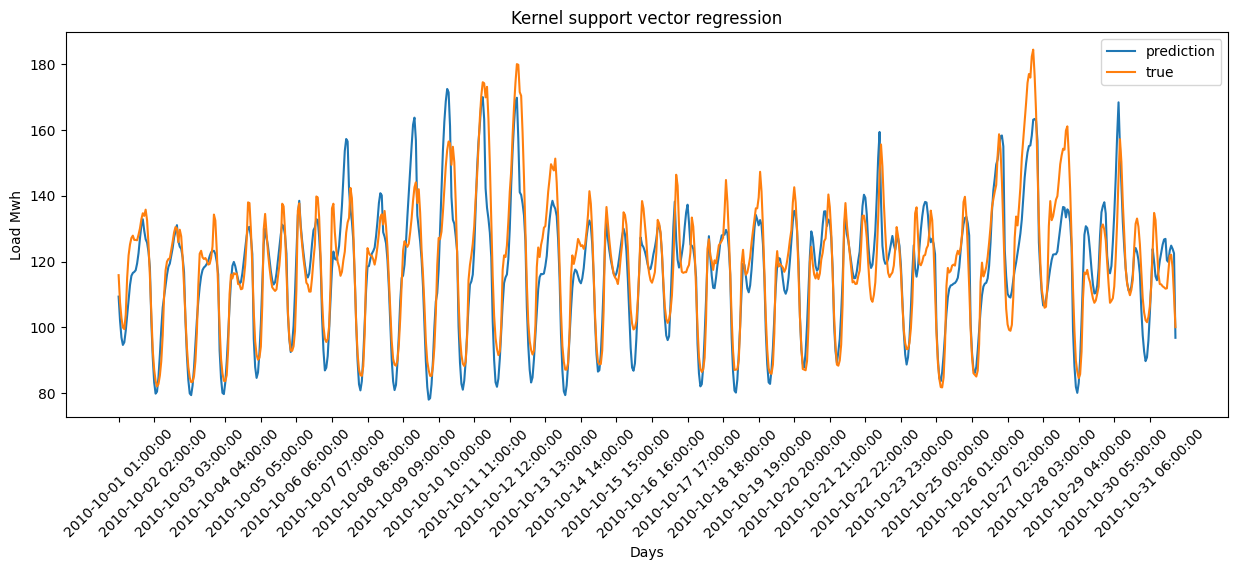

In [7]:
plt.figure(figsize=(15,5))
plt.plot(y_hat, label="prediction")
plt.plot(df_test["DS"], y_test, label="true")

plt.xticks(np.arange(0,len(y_test)+1, 25), rotation=45)

plt.xlabel("Days")
plt.ylabel("Load Mwh")
plt.title("Kernel support vector regression")
plt.legend()
plt.show()

In [9]:
np.sqrt(mean_squared_error(y_test, y_hat))

9.102829403785544

(array([  4.,   5.,  30.,  73., 222., 230., 123.,  36.,  14.,   7.]),
 array([-36.71631952, -29.98330766, -23.25029579, -16.51728393,
         -9.78427206,  -3.0512602 ,   3.68175167,  10.41476353,
         17.1477754 ,  23.88078726,  30.61379913]),
 <BarContainer object of 10 artists>)

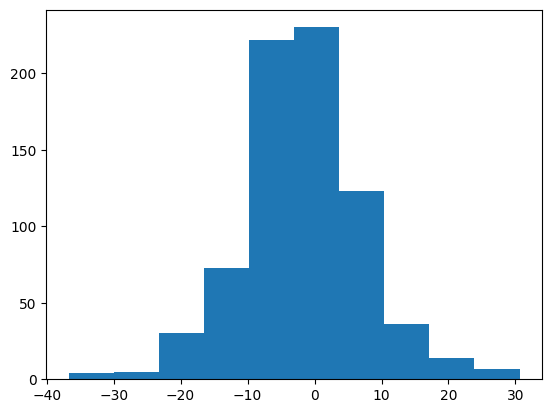

In [23]:
plt.hist(y_hat-y_test)